<a href="https://colab.research.google.com/github/XuxaRP/MVP_01_teste/blob/main/Leo_Heart_Atk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definição do problema**: Este é conjunto de dados que representa uma população de 299 pacientes que sofreram ataque cardíaco, constando algumas de suas características e de como foram seus atendimentos após o evento. Nossa análise visa verificar quais são os principais fatores que influenciaram na gravidade do ataque cardíaco e resultaram, ou não, em óbito após o evento.



*   Iniciamos importando as bibliotecas/pacotes que serão usadas bem como o dataset



In [147]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [148]:
# Importação do dataset
url = "https://raw.githubusercontent.com/XuxaRP/MVP_01_teste/main/Heart_base.csv"

# Lendo o arquivo
dataset = pd.read_csv(url, delimiter=',')

Inicialmente analisamos as variáveis contidas e fazemos a tradução visando facilitar nossa análise, assim como identificamos sua classe. Seguimos com uma breve descrição de cada variável bem como o código para traduzí-las:



1.   **Idade (age)**: Refere-se à idade dos pacientes. Medida em anos [40,…, 95].
2.   **Anemia (anaemia):** Indica se o paciente tem anemia (redução no número de glóbulos vermelhos). Booleana [0,1].
3.   **Creatinina Fosfoquinase (creatinine_phosphokinase):** É uma enzima presente no sangue e pode ser relevante para avaliar a saúde cardíaca. Medida em mcg/L[23,…, 7861].
4.   **Diabetes (diabetes)**: Indica se o paciente tem diabetes. Booleana [0,1].
5.   **Fração de Ejeção (ejection_fraction):** Refere-se à porcentagem de sangue que é bombeada para fora do coração a cada batimento. Medida em porcentagem [14,…, 80].
6.   **Pressão Alta (high_blood_pressure):** Indica se o paciente tem pressão alta. Booleana [0,1].
7.   **Plaquetas (platelets):** São células sanguíneas envolvidas na coagulação. Medida em kiloplaquetas/mL	[25.01,…, 850.00].
8.   **Creatinina Sérica (serum_creatinine):** Nível de creatinina no sangue, usado para avaliar a função renal. Medida em mg/dL	[0.50,…, 9.40].
9.   **Sódio Sérico (serum_sodium):** Concentração de sódio no sangue. Medida em mEq/L	[114,…, 148].
10.  **Sexo (sex):** Indica o gênero do paciente (masculino ou feminino). Binário	[0,1]
11.  **Tabagismo (smoking):** Indica se o paciente é fumante. Booleana [0,1].
12.  **Tempo (time):** Representa o tempo dispendido em internação/atendimento hospitalar/período de acompanhamento. Medida em dias [4,…, 285].
13.  **Evento de Óbito (DEATH_EVENT):** Indica se o paciente faleceu durante o período de acompanhamento. Booleana [0,1].

In [149]:
# Renomeando e traduzindo as variáveis
dataset = dataset.rename(columns={'age': 'idade', 'anaemia': 'anemia', 'creatinine_phosphokinase': 'creatinina_fosfoquinase','ejection_fraction': 'fracao_de_ejecao', 'high_blood_pressure': 'pressao_alta', 'platelets': 'plaquetas', 'serum_creatinine': 'creatinina_serica', 'serum_sodium': 'sodio_serico', 'sex': 'sexo', 'smoking': 'fumante', 'time': 'tempo', 'DEATH_EVENT': 'evento_obito'})

In [150]:
# Mostra as dimensões do dataset, evidenciando termos 299 linhas e 13 colunas.
dataset.shape



(299, 13)

In [151]:
# Analisando os valores faltantes
dataset.isnull().sum()

idade                      0
anemia                     0
creatinina_fosfoquinase    0
diabetes                   0
fracao_de_ejecao           0
pressao_alta               0
plaquetas                  0
creatinina_serica          0
sodio_serico               0
sexo                       0
fumante                    0
tempo                      0
evento_obito               0
dtype: int64

Ou seja, não temos valores faltantes.

In [152]:
 #Mostra as informações do dataset, explicitando o tipo do dado.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    299 non-null    float64
 1   anemia                   299 non-null    int64  
 2   creatinina_fosfoquinase  299 non-null    int64  
 3   diabetes                 299 non-null    int64  
 4   fracao_de_ejecao         299 non-null    int64  
 5   pressao_alta             299 non-null    int64  
 6   plaquetas                299 non-null    float64
 7   creatinina_serica        299 non-null    float64
 8   sodio_serico             299 non-null    int64  
 9   sexo                     299 non-null    int64  
 10  fumante                  299 non-null    int64  
 11  tempo                    299 non-null    int64  
 12  evento_obito             299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Após essa introdução sobre as varíaveis e verificar quais são seus tipos, fazemos uma breve análise verificando as linhas iniciais e finais:

In [153]:
# Mostra as 5 primeiras linhas do dataset
dataset.head(5)

idade  anemia  creatinina_fosfoquinase  diabetes  fracao_de_ejecao  \
0   75.0       0                      582         0                20   
1   55.0       0                     7861         0                38   
2   65.0       0                      146         0                20   
3   50.0       1                      111         0                20   
4   65.0       1                      160         1                20   

   pressao_alta  plaquetas  creatinina_serica  sodio_serico  sexo  fumante  \
0             1  265000.00                1.9           130     1        0   
1             0  263358.03                1.1           136     1        0   
2             0  162000.00                1.3           129     1        1   
3             0  210000.00                1.9           137     1        0   
4             0  327000.00                2.7           116     0        0   

   tempo  evento_obito  
0      4             1  
1      6             1  
2      7             1  
3      7             1  
4      8             1

In [154]:
# Mostra as 5 últimas linhas do dataset
dataset.tail(5)

idade  anemia  creatinina_fosfoquinase  diabetes  fracao_de_ejecao  \
294   62.0       0                       61         1                38   
295   55.0       0                     1820         0                38   
296   45.0       0                     2060         1                60   
297   45.0       0                     2413         0                38   
298   50.0       0                      196         0                45   

     pressao_alta  plaquetas  creatinina_serica  sodio_serico  sexo  fumante  \
294             1   155000.0                1.1           143     1        1   
295             0   270000.0                1.2           139     0        0   
296             0   742000.0                0.8           138     0        0   
297             0   140000.0                1.4           140     1        1   
298             0   395000.0                1.6           136     1        1   

     tempo  evento_obito  
294    270             0  
295    271             0  
296    278             0  
297    280             0  
298    285             0

Analisando as primeiras e últimas linhas verificamos que o dataset encontra-se organizado pela variável que mede o tempo de internação, bem como vemos que *aparentemente* há uma correlação negativa desta variável ''tempo" e a variável "evento de óbito". Abaixo continuamos a análise usando a função *describe* do Pandas, que nos retorna com um resumo estatístico dos atributos com valor numérico, selecionando as colunas com dados descritivos.


Podemos verificar que todos os dados estão completos, não faltando dados nem tendo aparentemente valores discrepantes


In [155]:
# Fazendo a análise das estatísticas descritivas
dataset[['idade', 'creatinina_fosfoquinase', 'fracao_de_ejecao', 'plaquetas','creatinina_serica','sodio_serico', 'tempo']].describe()

idade  creatinina_fosfoquinase  fracao_de_ejecao      plaquetas  \
count  299.000000               299.000000        299.000000     299.000000   
mean    60.833893               581.839465         38.083612  263358.029264   
std     11.894809               970.287881         11.834841   97804.236869   
min     40.000000                23.000000         14.000000   25100.000000   
25%     51.000000               116.500000         30.000000  212500.000000   
50%     60.000000               250.000000         38.000000  262000.000000   
75%     70.000000               582.000000         45.000000  303500.000000   
max     95.000000              7861.000000         80.000000  850000.000000   

       creatinina_serica  sodio_serico       tempo  
count          299.00000    299.000000  299.000000  
mean             1.39388    136.625418  130.260870  
std              1.03451      4.412477   77.614208  
min              0.50000    113.000000    4.000000  
25%              0.90000    134.000000   73.000000  
50%              1.10000    137.000000  115.000000  
75%              1.40000    140.000000  203.000000  
max              9.40000    148.000000  285.000000

Analisando a tabela acima não podemos cravar a existência de outliers, contudo podemos ver que a variável creatinina_fosfoquinase possuí uma dispersão relevante, evidenciado pelo seu desvio padrão.

Abaixo faremos uma análise das variáveis binárias.

In [156]:

# Lista das distribuições de classes
cabecalho_coluna = ['anemia', 'diabetes', 'pressao_alta', 'sexo', 'fumante', 'evento_obito']

# Criando uma função para contagens e porcentagens:
def exibe_descricao_categoria(df, columns):
    for col in columns:
        print(f"Distribuição para {col}:")
        contagem = dataset[col].value_counts()
        porcentagem = dataset[col].value_counts(normalize=True) * 100
        distribuicao = pd.DataFrame({'Contagem': contagem, 'Porcentagem(%)': porcentagem})
        print(distribuicao)
        print()

# Exibindo a distribuição para todas as colunas categóricas
exibe_descricao_categoria(dataset, cabecalho_coluna)

Distribuição para anemia:
        Contagem  Porcentagem(%)
anemia                          
0            170       56.856187
1            129       43.143813

Distribuição para diabetes:
          Contagem  Porcentagem(%)
diabetes                          
0              174        58.19398
1              125        41.80602

Distribuição para pressao_alta:
              Contagem  Porcentagem(%)
pressao_alta                          
0                  194       64.882943
1                  105       35.117057

Distribuição para sexo:
      Contagem  Porcentagem(%)
sexo                          
1          194       64.882943
0          105       35.117057

Distribuição para fumante:
         Contagem  Porcentagem(%)
fumante                          
0             203       67.892977
1              96       32.107023

Distribuição para evento_obito:
              Contagem  Porcentagem(%)
evento_obito                          
0                  203       67.892977
1                   9

Podemos verificar: O público médio do dataset é composto por uma pessoa não anêmica, nem diabética e hipertensa, do sexo masculino, não fumante e que sobreviveu ao ataque cardíaco.

Abaixo faremos uma análise da Correlação de Pearson visando identificar a correlação entre as variáveis coletadas

In [157]:
# Correlação de Pearson
dataset.corr(method = 'pearson')

idade    anemia  creatinina_fosfoquinase  \
idade                    1.000000  0.088006                -0.081584   
anemia                   0.088006  1.000000                -0.190741   
creatinina_fosfoquinase -0.081584 -0.190741                 1.000000   
diabetes                -0.101012 -0.012729                -0.009639   
fracao_de_ejecao         0.060098  0.031557                -0.044080   
pressao_alta             0.093289  0.038182                -0.070590   
plaquetas               -0.052354 -0.043786                 0.024463   
creatinina_serica        0.159187  0.052174                -0.016408   
sodio_serico            -0.045966  0.041882                 0.059550   
sexo                     0.065430 -0.094769                 0.079791   
fumante                  0.018668 -0.107290                 0.002421   
tempo                   -0.224068 -0.141414                -0.009346   
evento_obito             0.253729  0.066270                 0.062728   

                         diabetes  fracao_de_ejecao  pressao_alta  plaquetas  \
idade                   -0.101012          0.060098      0.093289  -0.052354   
anemia                  -0.012729          0.031557      0.038182  -0.043786   
creatinina_fosfoquinase -0.009639         -0.044080     -0.070590   0.024463   
diabetes                 1.000000         -0.004850     -0.012732   0.092193   
fracao_de_ejecao        -0.004850          1.000000      0.024445   0.072177   
pressao_alta            -0.012732          0.024445      1.000000   0.049963   
plaquetas                0.092193          0.072177      0.049963   1.000000   
creatinina_serica       -0.046975         -0.011302     -0.004935  -0.041198   
sodio_serico            -0.089551          0.175902      0.037109   0.062125   
sexo                    -0.157730         -0.148386     -0.104615  -0.125120   
fumante                 -0.147173         -0.067315     -0.055711   0.028234   
tempo                    0.033726          0.041729     -0.196439   0.010514   
evento_obito            -0.001943         -0.268603      0.079351  -0.049139   

                         creatinina_serica  sodio_serico      sexo   fumante  \
idade                             0.159187     -0.045966  0.065430  0.018668   
anemia                            0.052174      0.041882 -0.094769 -0.107290   
creatinina_fosfoquinase          -0.016408      0.059550  0.079791  0.002421   
diabetes                         -0.046975     -0.089551 -0.157730 -0.147173   
fracao_de_ejecao                 -0.011302      0.175902 -0.148386 -0.067315   
pressao_alta                     -0.004935      0.037109 -0.104615 -0.055711   
plaquetas                        -0.041198      0.062125 -0.125120  0.028234   
creatinina_serica                 1.000000     -0.189095  0.006970 -0.027414   
sodio_serico                     -0.189095      1.000000 -0.027566  0.004813   
sexo                              0.006970     -0.027566  1.000000  0.445892   
fumante                          -0.027414      0.004813  0.445892  1.000000   
tempo                            -0.149315      0.087640 -0.015608 -0.022839   
evento_obito                      0.294278     -0.195204 -0.004316 -0.012623   

                            tempo  evento_obito  
idade                   -0.224068      0.253729  
anemia                  -0.141414      0.066270  
creatinina_fosfoquinase -0.009346      0.062728  
diabetes                 0.033726     -0.001943  
fracao_de_ejecao         0.041729     -0.268603  
pressao_alta            -0.196439      0.079351  
plaquetas                0.010514     -0.049139  
creatinina_serica       -0.149315      0.294278  
sodio_serico             0.087640     -0.195204  
sexo                    -0.015608     -0.004316  
fumante                 -0.022839     -0.012623  
tempo                    1.000000     -0.526964  
evento_obito            -0.526964      1.000000

Ao verificarmos a tabela de Correlação de Pearson verificamos algumas correlações relevantes entre a nossa variável de estudo, evento_obito, e algumas que se destacam, principalmente fracao_de_ejecao, creatinina_serica e tempo.

Abaixo plotamos os histogramas das variáveis para fazer uma análise visual das distribuições:


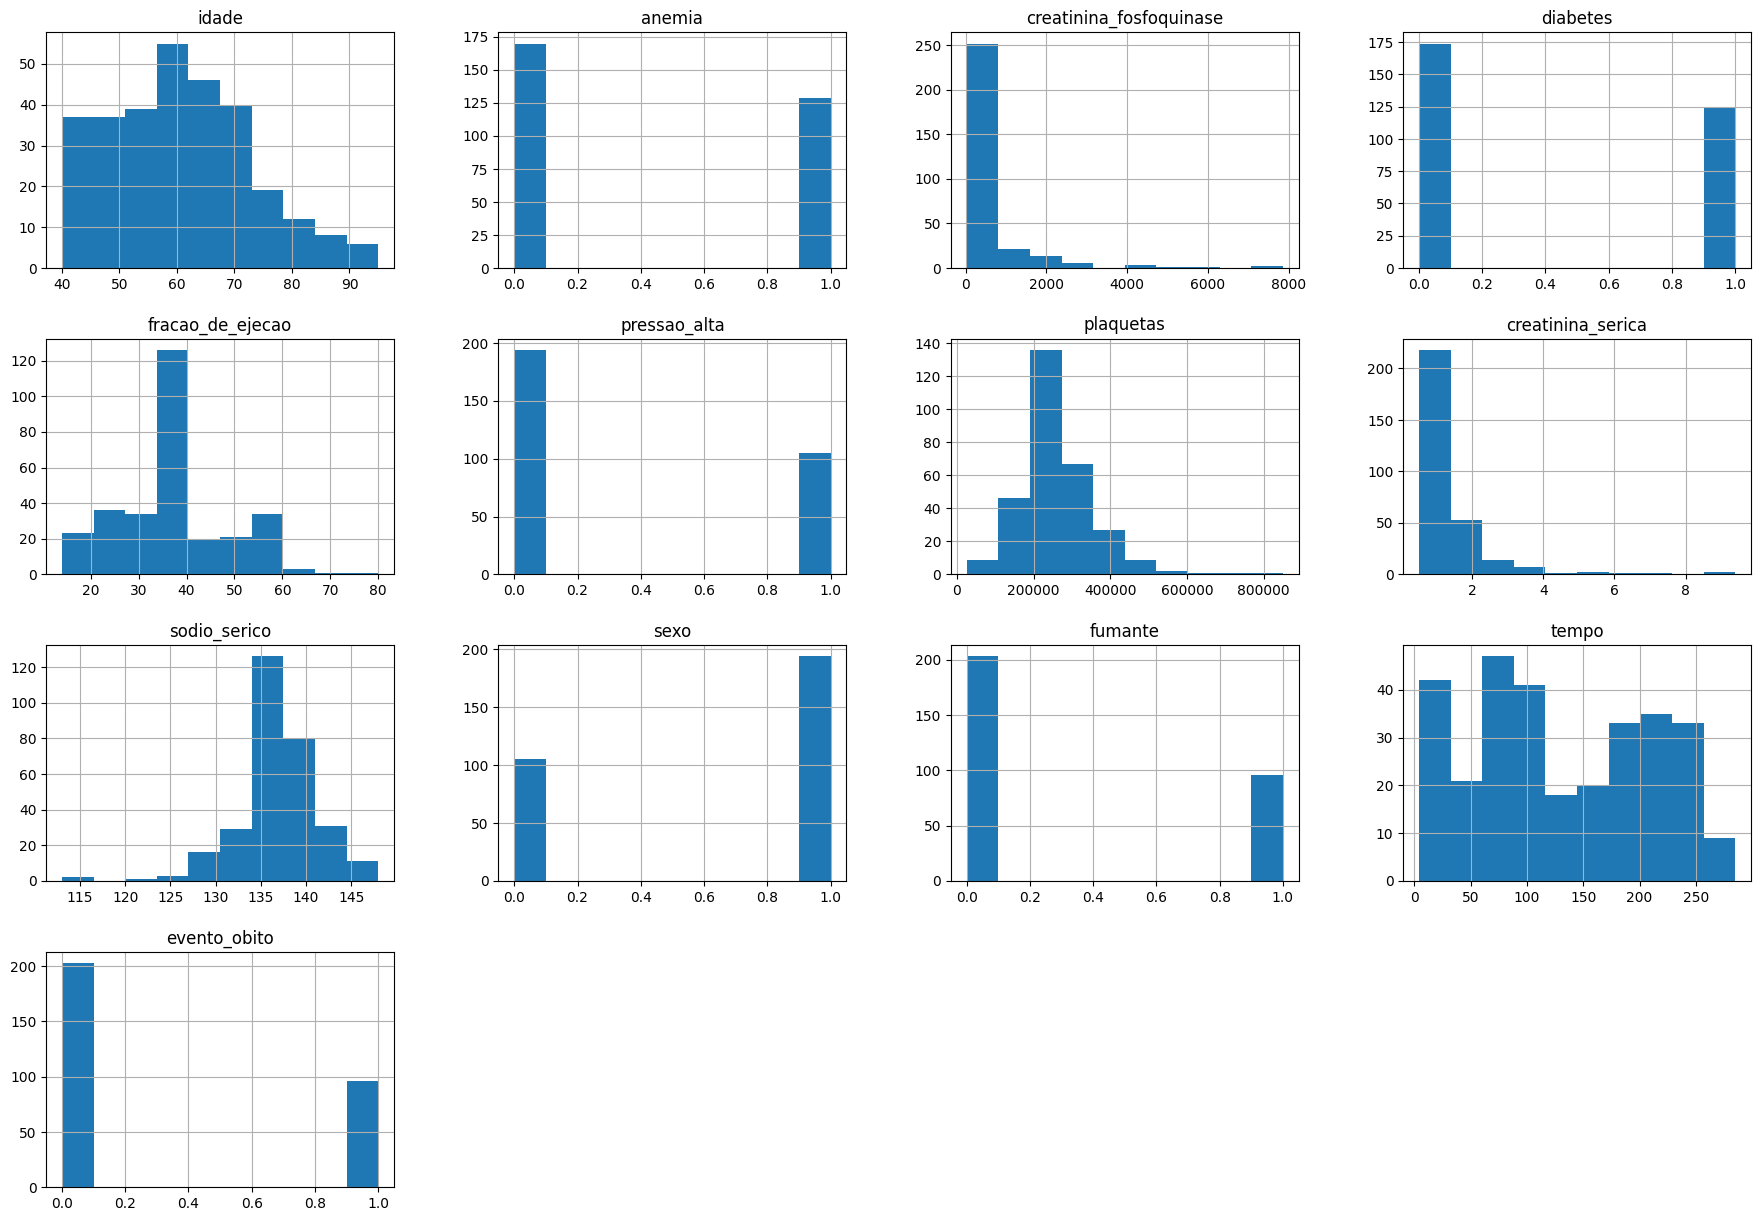

In [136]:
# Histograma
dataset.hist(figsize = (22,15))
plt.show()

Nos historogramas podemos analisar alguns dados interessantes, como que a maior parte dos ataques cardíacos ocorrem em indivíduos com idade entre 40 e 70 anos, sendo a maior parte do sexo masculino, não portador de pressão alta. O tempo de atendimento não tem uma prevalência, sendo bem distribuido.

Abaixo fazemos uma plotagem dos gráficos de densidade, para novamente ver as distribuições das variáveis.

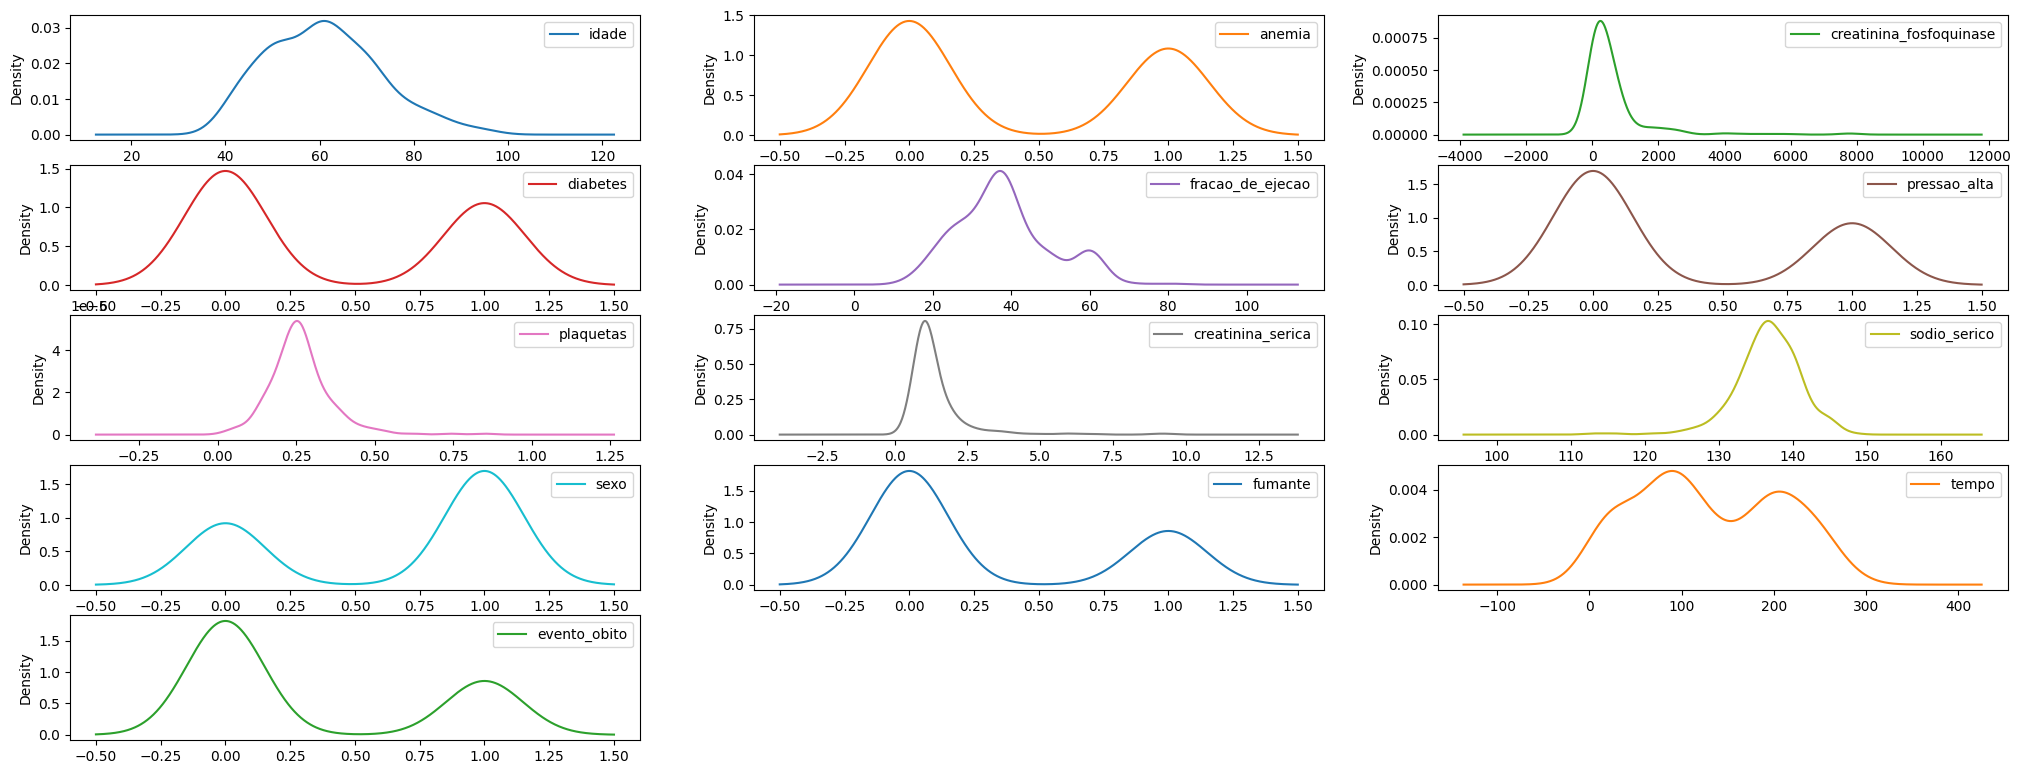

In [137]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (13,3), sharex = False, figsize = (25,25))
plt.show()

Analisando os gráficos de densidade podemos confirmar o que vimos nos historogramas: A maior parte dos indivíduos que sofrem ataque cardíaco tem entre 40 e 70 anos, do sexo masculino e sobrevivem ao evento.

Abaixo plotamos gráficos do tipo "Boxplot", especialmente úteis para verificar a existência de dispersões (*outliers*).

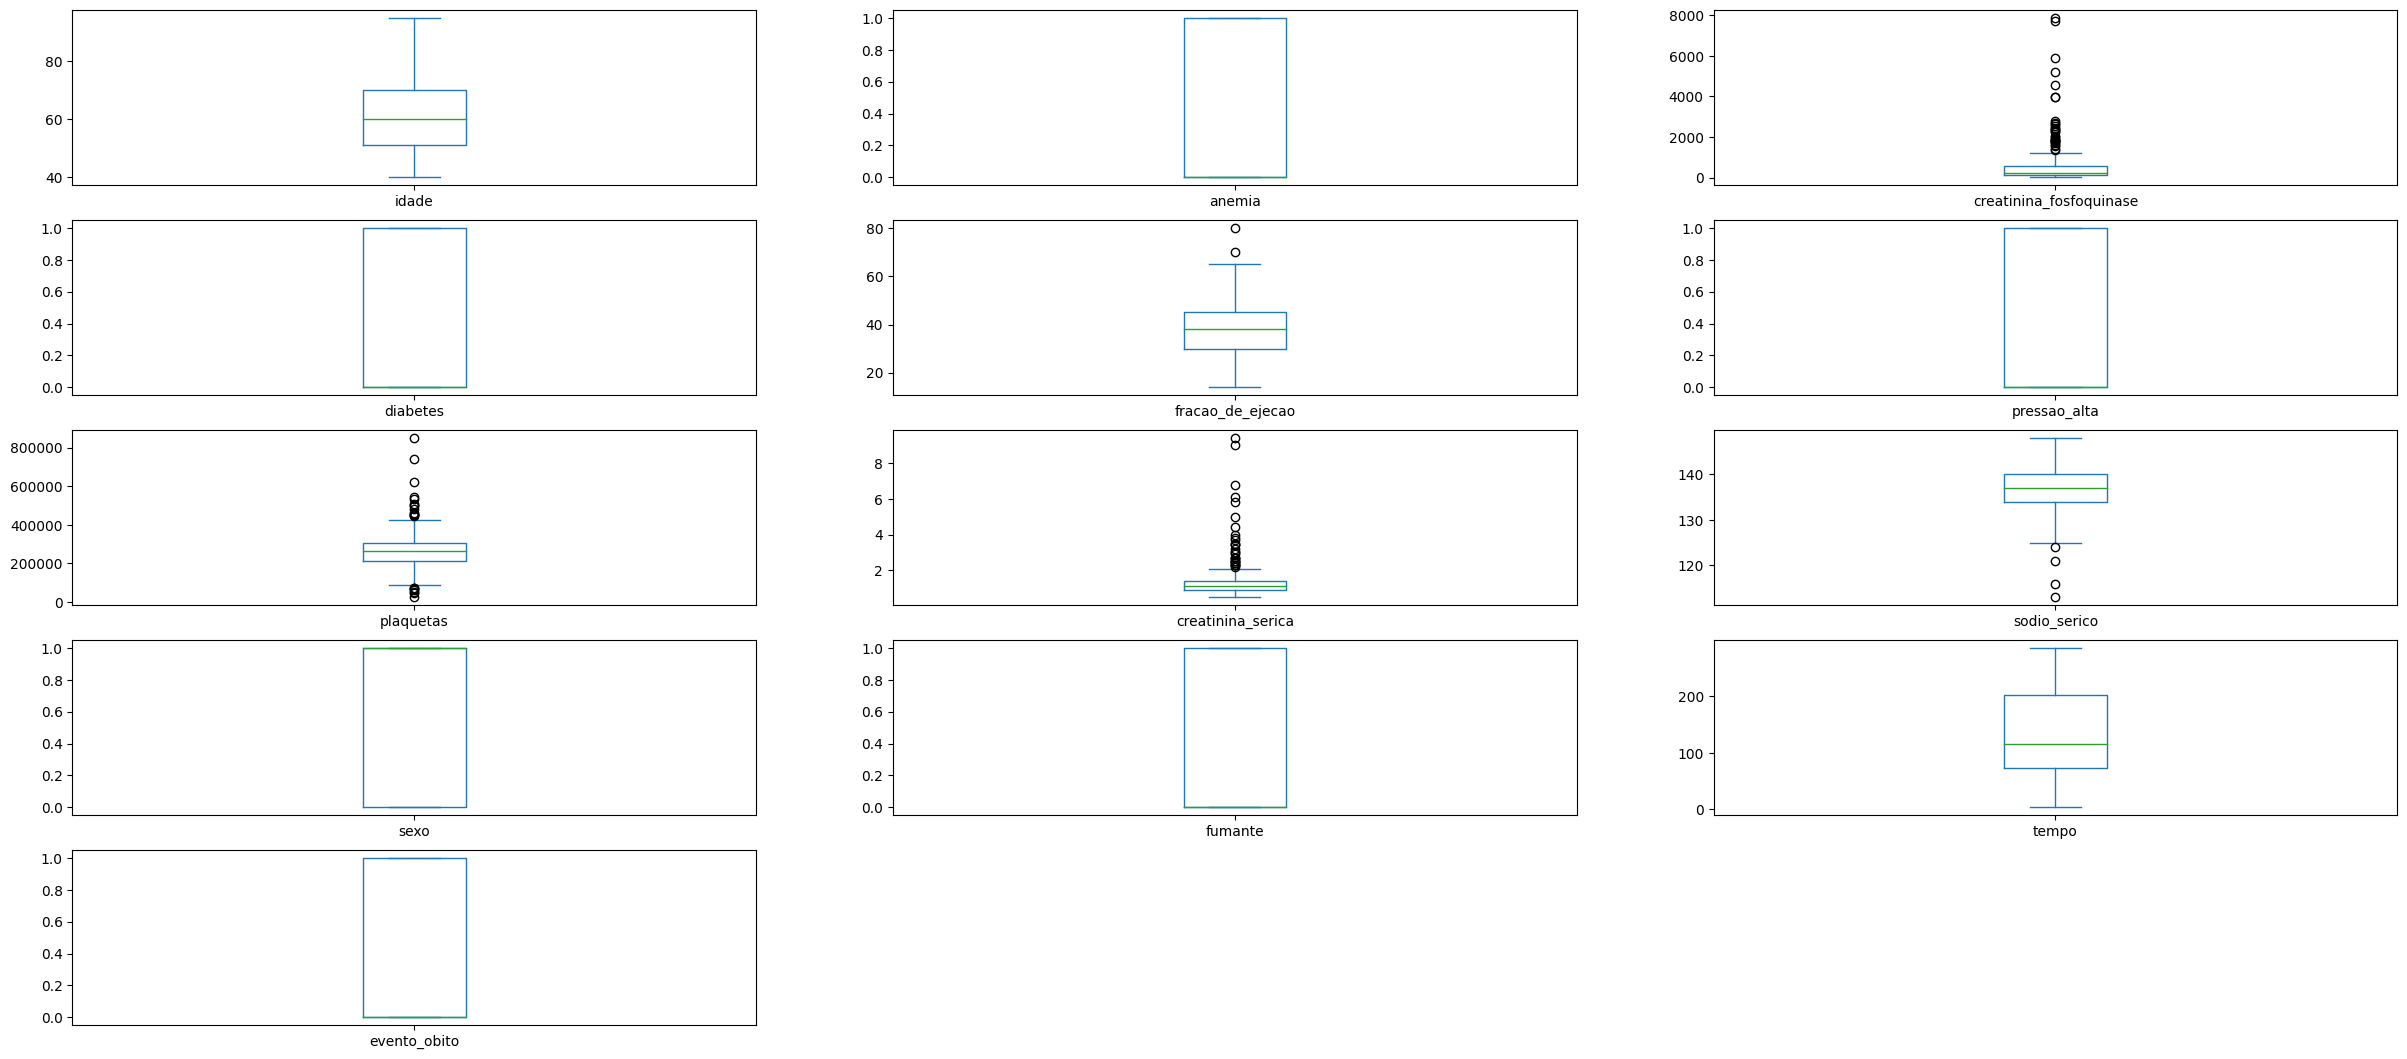

In [158]:
# Boxplot visando analisar outliers
dataset.plot(kind = 'box', subplots = True, layout = (13,3), sharex = False, sharey = False, figsize = (30,35))
plt.show()

Com base na visualização dos gráficos do tipo boxplot, podemos ver que há indícios de existirem alguns outliers nas variáveis creatinina_fosfoquinase, creatinina_serica, fracao_de_ejecao e plaquetas. Dessa forma vale uma análise aprofundada, que faremos usando a técnica do Z-Score, ferramenta utilizada para verificar valores que se desviam significativamente do padrão em um dataset

In [159]:
from scipy import stats

#Definindo as colunas numéricas
colunas_numericas = ['creatinina_fosfoquinase', 'creatinina_serica', 'fracao_de_ejecao', 'plaquetas', 'sodio_serico', 'tempo'] # Corrected the typo in 'sodios_serico'

def detectar_outliers_zcore(dataset, colunas, threshold=3):
    for col in colunas:
        z_scores = stats.zscore(dataset[col].dropna())  #removendo os valores ausentes (NaN) e seleciona a coluna atual do conjunto de dados
        abs_z_scores = abs(z_scores)
        outliers = (abs_z_scores > threshold)
        print(f"Número de outliers na variável {col}: {outliers.sum()}")
        print(dataset[col][outliers])
        print()

# Detectando os outliers usando Z-Score
detectar_outliers_zcore(dataset, colunas_numericas)

Número de outliers na variável creatinina_fosfoquinase: 7
1      7861
52     3964
60     7702
72     5882
103    5209
134    4540
171    3966
Name: creatinina_fosfoquinase, dtype: int64

Número de outliers na variável creatinina_serica: 6
9      9.4
28     5.8
52     6.8
131    6.1
217    9.0
228    5.0
Name: creatinina_serica, dtype: float64

Número de outliers na variável fracao_de_ejecao: 1
64    80
Name: fracao_de_ejecao, dtype: int64

Número de outliers na variável plaquetas: 3
105    621000.0
109    850000.0
296    742000.0
Name: plaquetas, dtype: float64

Número de outliers na variável sodio_serico: 3
4      116
19     121
199    113
Name: sodio_serico, dtype: int64

Número de outliers na variável tempo: 0
Series([], Name: tempo, dtype: int64)



Assim, verificamos que as suspeitas verificamas pelo boxplot tinham fundamento, existindo valores considerados outliers nas variáveis creatinina_fosfoquinase, creatinina_seric, fracao_de_ejecao, plaquetas e sodio_serico. Dessa forma vamos tratar esses valores aplicamos a técnica de *Winsorização*, ferramenta estatística cujo objetivo é diminuir o impacto de valores extremos, visando diminuir/eliminar a distorção de resultados.

In [160]:
from scipy.stats.mstats import winsorize

# Criamos novas colunas  winsorizadas
dataset['creatinina_fosfoquinase_winsorized'] = winsorize(dataset['creatinina_fosfoquinase'], limits=(0.05, 0.05))
dataset['creatinina_serica_winsorized'] = winsorize(dataset['creatinina_serica'], limits=(0.05, 0.05))
dataset['fracao_de_ejecao_winsorized'] = winsorize(dataset['fracao_de_ejecao'], limits=(0.05, 0.05))
dataset['plaquetas_winsorized'] = winsorize(dataset['plaquetas'], limits=(0.05, 0.05))







In [161]:
# Excluindo as colunas originais que detinham outliers e foram winsorizadas. Verificando como ficou o dataset
dataset=dataset.drop(columns=['creatinina_fosfoquinase', 'creatinina_serica', 'fracao_de_ejecao', 'plaquetas', 'sodio_serico' ])

print(dataset)

     idade  anemia  diabetes  pressao_alta  sexo  fumante  tempo  \
0     75.0       0         0             1     1        0      4   
1     55.0       0         0             0     1        0      6   
2     65.0       0         0             0     1        1      7   
3     50.0       1         0             0     1        0      7   
4     65.0       1         1             0     0        0      8   
..     ...     ...       ...           ...   ...      ...    ...   
294   62.0       0         1             1     1        1    270   
295   55.0       0         0             0     0        0    271   
296   45.0       0         1             0     0        0    278   
297   45.0       0         0             0     1        1    280   
298   50.0       0         0             0     1        1    285   

     evento_obito  creatinina_fosfoquinase_winsorized  \
0               1                                 582   
1               1                                2281   
2           

Fazemos nova análise com a matriz de correlação de Seaborn para vermos as diferenças após o tratamento dos outliers.

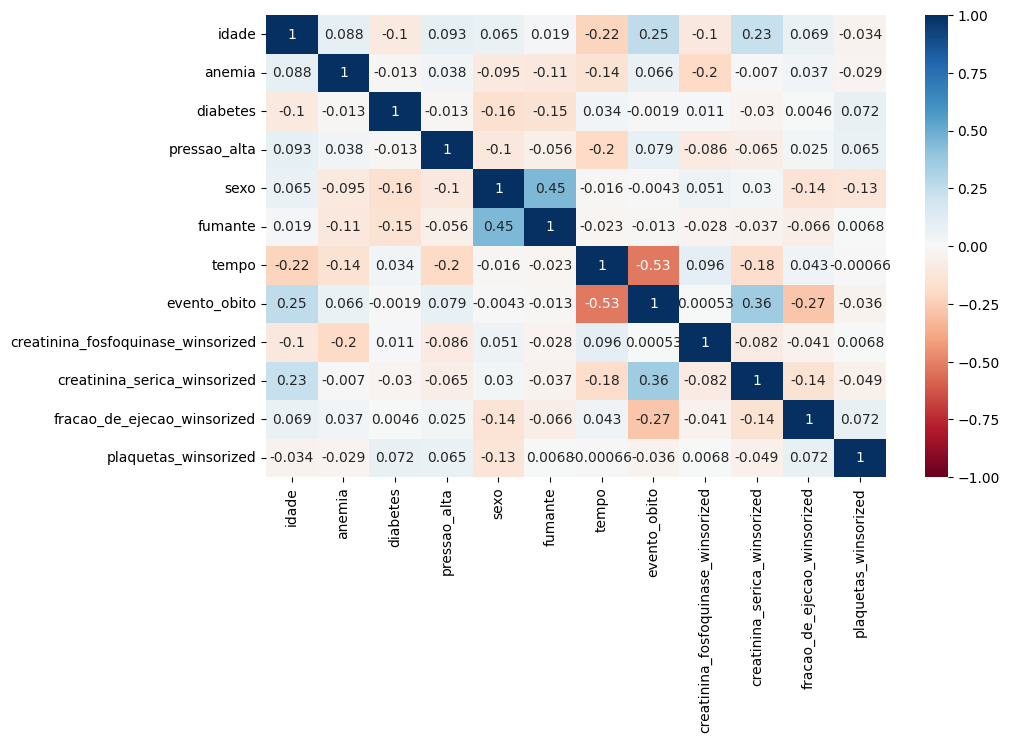

In [162]:
# Matriz de Correlação com Seaborn com os outliers tratados e as novas variáveis
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Por fim plotamos novamente boxplot para conferir se o problemas dos outliers foram corrigidos.

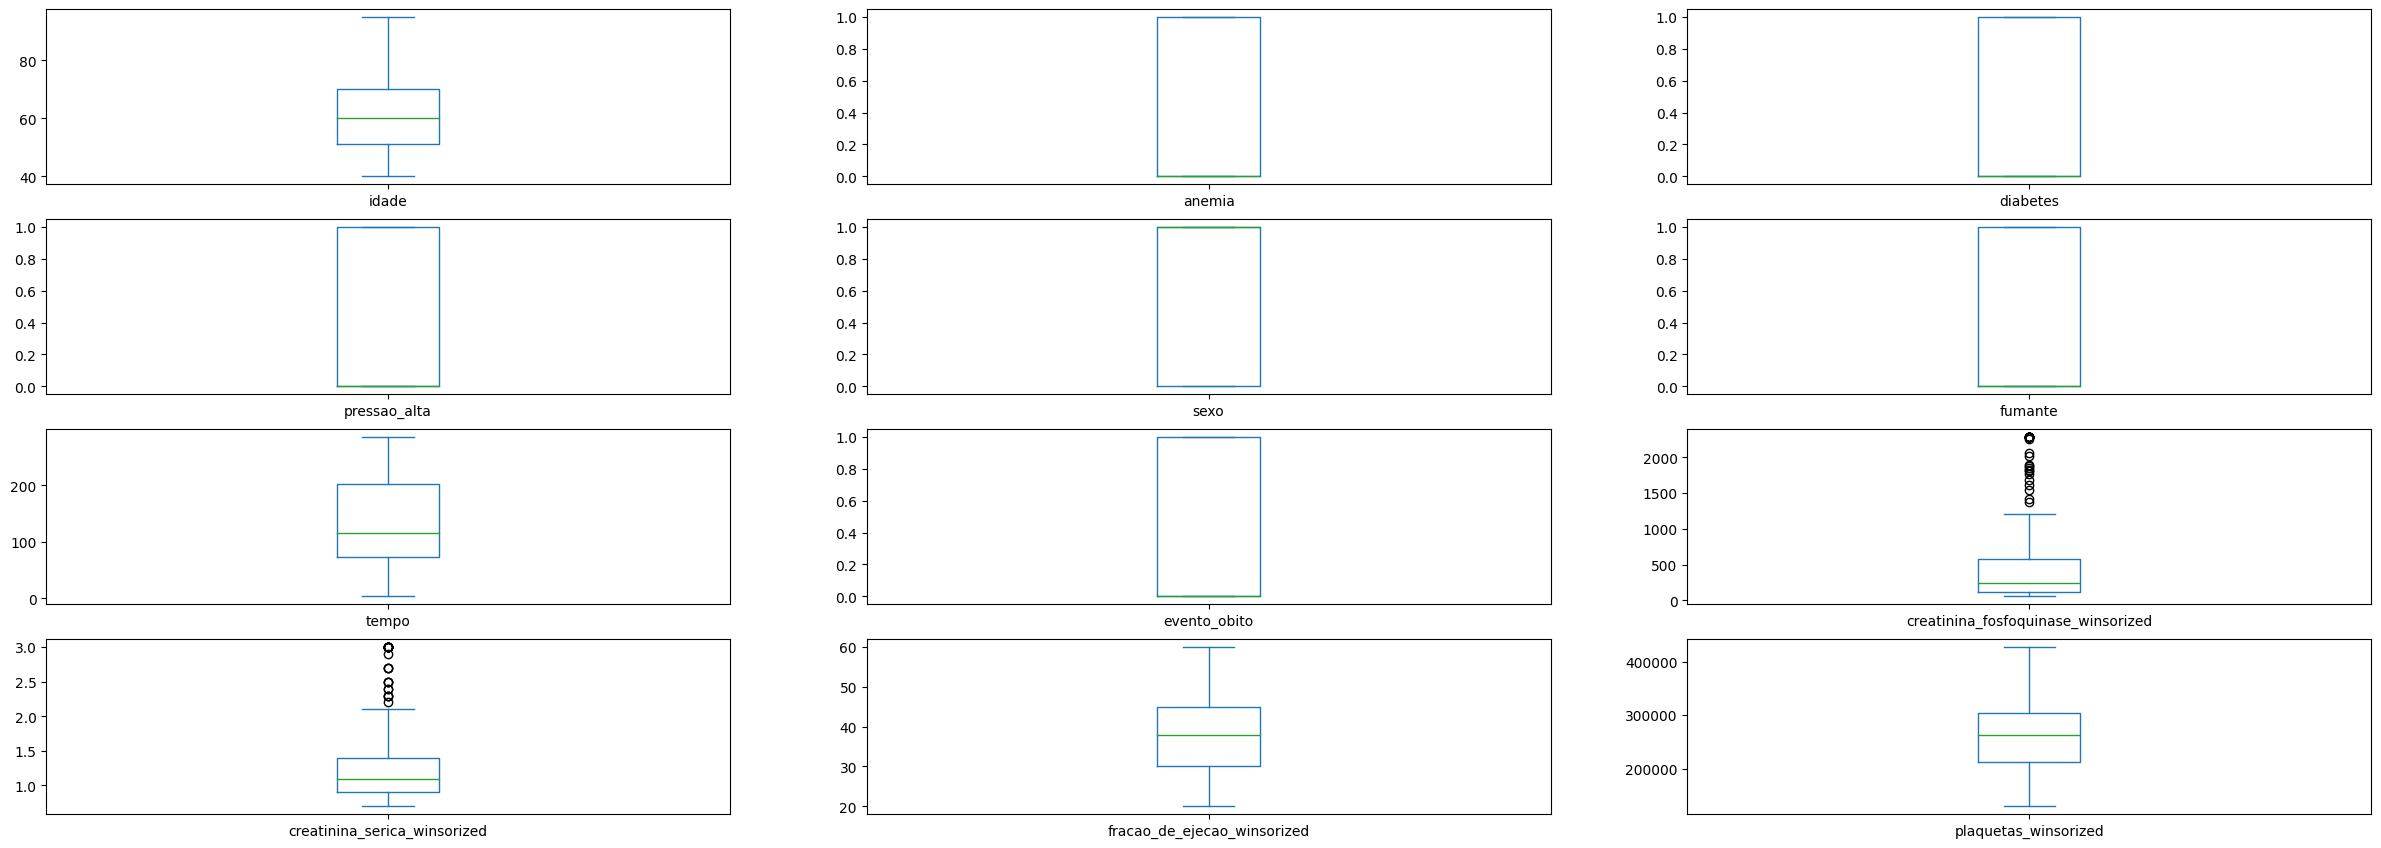

In [164]:

#Analisando novamente boxplot para verificar se os outliers foram corrigidos
dataset.plot(kind = 'box', subplots = True, layout = (13,3), sharex = False, sharey = False, figsize = (30,35))
plt.show()

Por fim vamos criar um um gráfico de dispersão visando como base a variável de óbito, buscando ter insights gráficos:

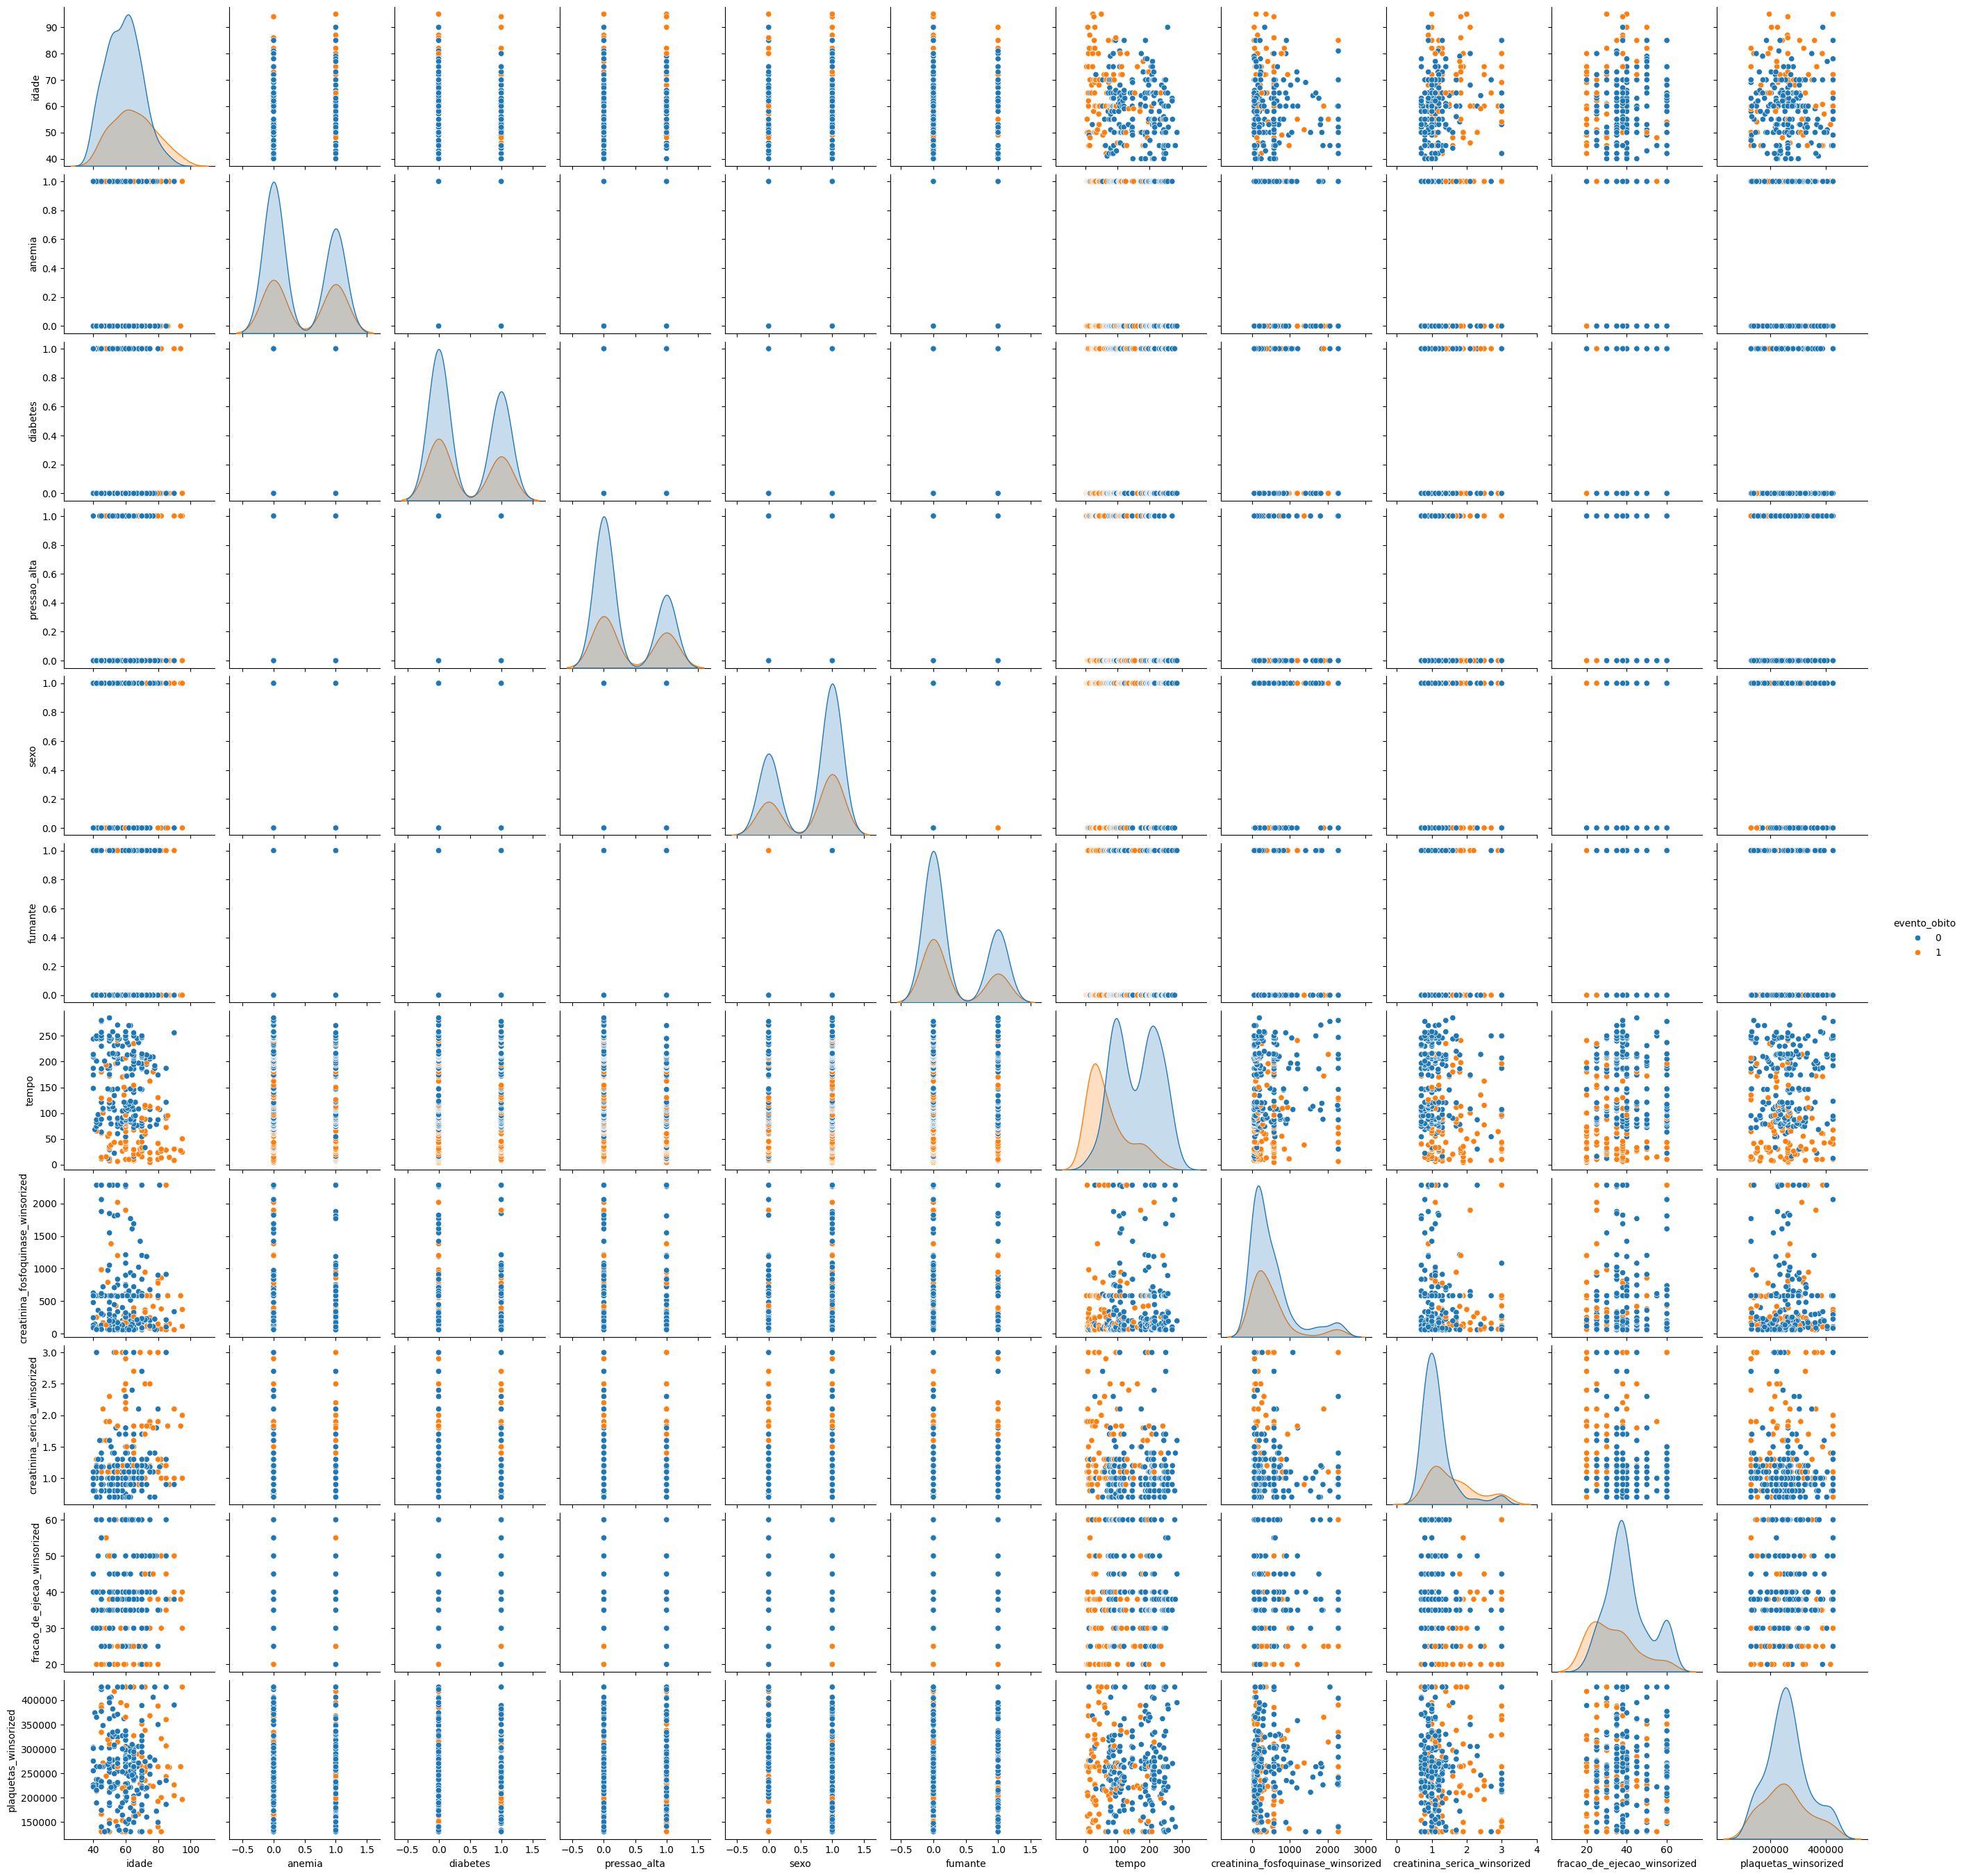

In [176]:
sns.pairplot(dataset, hue = "evento_obito", height = 2.5);

Verificamos que podemos confirmar o insight inicial - da existência de uma forte correlação entra a variável tempo e evento_obito.

Agora vamos instalar o Pandas Profiling e executá-lo para ter algumas visões mais detalhadas e confirmar alguns insights já vistos:

In [177]:
# Instalando o pandas profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 17.8 MB 38.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=2546351fbd0709c33976397287a49e545ff7e16c30120484991194c9e76e45f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ghea6yrq/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3424de835f1b68e10703534e2bc68e5278ae066a981c2b8f31e97b033a8abb21
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [178]:
# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-178-2d06d9442779>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [179]:
# geração do reporte em HTML
profile = ProfileReport(dataset, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]